In [ ]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #used to split data into training and test data
from sklearn.ensemble import RandomForestRegressor #Used to make ML model
from sklearn import metrics #used to evaluate accuracy score of model means error and accuracy scores

In [ ]:
#Loading the data from csv to a data frame
gold_df = pd.read_csv('/data/notebook_files/gld_price_data.csv')

In [ ]:
#Now we will understand the data first
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#Printing data from last
gold_df.tail

<bound method NDFrame.tail of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [ ]:
#We can see from head and tail that we have data from the year 2008 - 2018 i.e about 10 years
#Now lets see the no of rows and coloumns
gold_df.shape

(2290, 6)

In [ ]:
#Getting basic information about data
gold_df.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [ ]:
#Lets look for null values in the dataframe
gold_df.isnull().sum()

Date 0
SPX 0
GLD 0
USO 0
SLV 0
EUR/USD 0
dtype: int64

In [ ]:
#Table shows 0 missing values so there is no null value present in the data frame
#Now lets take a statistical measure of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#THE ABOVE TABLES GIVES US THE STATISTICAL INTERPRETATION OF THE DATA
#25% MEANS 25% OF VALUES IN THE TABLE ARE LESS THAN 1239 SIMILARLY 50% , 75% OF THE VALUES IN THE TABLE ARE LESS THAN 1551 AND 2073 

So now we will check the co relation in the dataframe

That means what is the relation between different coloumns in the dataframe

Correlation:(Basically corelation shows which coloumn is related to which coloumn in the dataframe)

1)Positive Correlation(if one variable increases other also increases-(directly proportional))

2)Negative Correlation(if one value increases then other decreases(inversely proportional))

In [ ]:
#Now lets check co relation between various coloumns

correlation = gold_df.corr()
print(correlation)
#corr returns a dataframe with values from +1 to -1 which denotes compatiability between coloumns
#so now correlation is a dataframe containing values between -1 to +1 

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<AxesSubplot:>

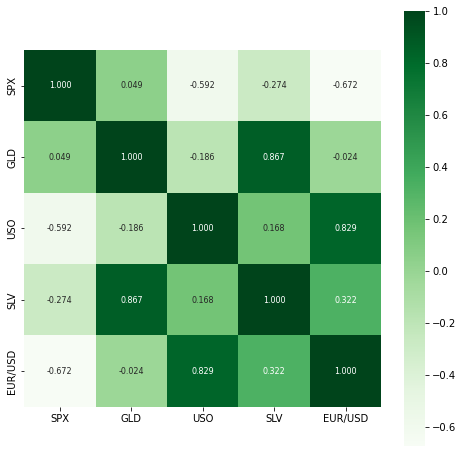

In [ ]:
#Now constructing a heatmap to understand the Correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True , square = True , fmt = '.3f' , annot = True , annot_kws={'size' : 8}, cmap = 'Greens')
#Below is a heatmap with colour intensity increasing or decreasing based on corr values

In [ ]:
#Now lets print the coloumn correlation individually to for better understanding of each coloumn
print(correlation['SPX'] , "\n")
print(correlation['GLD'], "\n")
print(correlation['USO'], "\n")
print(correlation['SLV'], "\n")
print(correlation['EUR/USD'], "\n")

SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64 

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64 

SPX       -0.591573
GLD       -0.186360
USO        1.000000
SLV        0.167547
EUR/USD    0.829317
Name: USO, dtype: float64 

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64 

SPX       -0.672017
GLD       -0.024375
USO        0.829317
SLV        0.321631
EUR/USD    1.000000
Name: EUR/USD, dtype: float64 



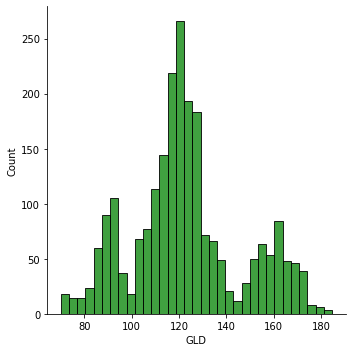

In [ ]:
#Now lets see the distribution of the gold values 
#ie, what is the range of values of gold prices
#for this we will use the Seaborn "dist" plot
sns.displot(gold_df['GLD'] , color='green')

Now we will split the features and target coloumns

Here target is gold price ie ,'GLD' AND THE FEATURES ARE SPX,USO,SLV,EUR/USD.
 
We will also remove the date coloumn as it is not required for our further analysis

In [ ]:
#Now we will make two coloumns X and Y where X will contain all the features and Y will contain the target value
#So we will drop Date and GLD coloumns from our dataframe and we will get a dataframe containing the features SPX,USO,SLV,EUR/USD.

X = gold_df.drop(['Date','GLD'] , axis=1) # axis = 1 becAuase we are dropping a coloumn
Y = gold_df['GLD']

In [ ]:
#NOW LET'S PRINT X
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
#NOW LET'S PRINT Y
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


NOW AS WE HAVE SUCCESFULLY SPLITTED OUR DATAFRAME INTO FEATURES AND TARGET

SO LETS SPLIT IT INTO TESTING AND TRAINING DATA NOW

FOR FEATURES WE WILL FIT 80% OF VALUES INTO X_train and 20% of the values into X_test.

SIMILARLY FOR TARGET ALSO WE WILL FIT 80% OF VALUES INTO X_train and 20% of the values into Y_test.

In [ ]:
#Now using sklearn model selection's train_test_split module we will easily split our data into training and test data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 3)
#test_size = 0.2 means 20% of the data is test_set here
#random_state = 3 means degree of randomness - the higher the value the more randomly the values will be splitted

NOW OUR TRAINING AND TEST SETS ARE READY 

SO LETS PRINT THEM 

In [ ]:
print(X_train)

              SPX        USO        SLV   EUR/USD
1581  2107.780029  18.490000  15.580000  1.117905
2172  2584.840088  11.380000  16.090000  1.166113
985   1313.719971  29.799999  26.709999  1.250469
1267  1733.150024  36.380001  21.049999  1.366699
2042  2341.590088  10.040000  17.150000  1.086095
...           ...        ...        ...       ...
789   1120.760010  31.780001  38.439999  1.412469
968   1318.859985  34.090000  27.049999  1.256124
1667  2067.639893  15.650000  13.920000  1.109004
1688  1913.849976  14.810000  13.940000  1.129344
1898  2185.790039  10.210000  18.959999  1.113908

[1832 rows x 4 columns]


In [ ]:
print(X_test)

              SPX        USO        SLV   EUR/USD
863   1236.469971  37.880001  30.490000  1.337167
1351  1836.250000  36.689999  20.969999  1.372119
2284  2672.629883  14.100000  15.520000  1.193374
533   1086.839966  34.770000  17.860001  1.211402
2247  2726.800049  12.350000  15.530000  1.241665
...           ...        ...        ...       ...
745   1317.369995  38.470001  34.270000  1.403666
58    1325.760010  85.730003  18.320000  1.581403
2100  2425.530029   9.270000  14.990000  1.147394
283    851.919983  27.879999  12.540000  1.325803
2060  2387.449951  10.260000  16.570000  1.090893

[458 rows x 4 columns]


In [ ]:
print(Y_train)

1581    115.470001
2172    121.309998
985     153.759995
1267    127.419998
2042    119.529999
           ...    
789     174.580002
968     151.619995
1667    104.860001
1688    109.199997
1898    127.669998
Name: GLD, Length: 1832, dtype: float64


In [ ]:
print(Y_test)

863     161.990005
1351    127.580002
2284    124.570000
533     118.970001
2247    125.720001
           ...    
745     147.830002
58       93.459999
2100    115.620003
283      88.800003
2060    120.839996
Name: GLD, Length: 458, dtype: float64


SO IT'S TIME TO BUILD OUR MODEL NOW USING RANDOMFOREST REGRESSOR AS OUR Training and Test Datasets ARE READY

In [ ]:
#first let's make a random forest with n_estimators = some value
#n_estimators basically means the number of decision trees the random forest will contain
regressor = RandomForestRegressor(n_estimators = 1000)

In [ ]:
#NOW LET'S TRAIN THE MODEL USING X_train and Y_train
#BASICALLY FEED THE DATASET INTO THE RANDOM FOREST

regressor.fit(X_train,Y_train)
print(Y_test)

#AFTER THE DATASET IS SORTED BASED ON ALL FEATURES WE WILL FEED X_test values into the random forest model and compare those values with Y_train 

863     161.990005
1351    127.580002
2284    124.570000
533     118.970001
2247    125.720001
           ...    
745     147.830002
58       93.459999
2100    115.620003
283      88.800003
2060    120.839996
Name: GLD, Length: 458, dtype: float64


In [ ]:
#NOW LETS TAKE THE PREDICTION OF THE MODEL BY FEEDING X_train into the model
gold_price_predictions = regressor.predict(X_test)
print(gold_price_predictions)

[163.96318989 127.54134908 124.20064966 119.65016889 125.9637589
  86.11498812 171.79794161 136.84125031 106.90383082 132.89773165
 120.64460926 124.77958034 143.41947851 104.57063995  80.81354908
 119.77856016 140.36061932  90.28479058  91.50612939 128.3110123
 125.78158913 147.82143976 116.57441167 153.1377292  129.41360866
 129.44664081 118.24652107 111.42830046 168.43478204 158.04891799
 125.96267189 154.07170157 127.05946946 122.62507783 116.33515146
 154.67016009 115.03321016 120.55881124 103.92672201 105.46258039
 134.83808908  85.76490966 155.72134121 121.31850002 122.35723091
 155.37891055 120.51809003 116.59195993 168.48857235 116.35716048
 137.78310171 161.72396854 158.49570036 153.20206099 123.94176031
 116.96641005 167.22719019 117.22727961 165.71750032  84.10487993
 121.35521912 122.18883013 119.95892025 172.04122842 118.88410958
 180.25299689 161.80058291 138.28387251 115.64916991  92.61655063
 172.00483973 117.58229971 117.77744867 125.55257989 147.21352987
  91.2347309

In [ ]:
#Now lets calculate the error score(also called R SQUARED ERROR) i.e a value that will show us the up's and down's between the dataset we got and the dataset which is already present i.e Y_test
#metrics is mopdule in scikit learn used specifically for this calculating error and accuracy scores
max_error = metrics.max_error(Y_test,gold_price_predictions) #THIS IS MAXIMUM DEVIATION IN THE DATA
error_score = metrics.r2_score(Y_test , gold_price_predictions) #THIS IS CALLED THE R SQUARED ERROR
print("The max error is : " , max_error)
print("The error score is : " , error_score)

The max error is :  25.01395934200022
The error score is :  0.9854703110322889


0.9855 represents that our model is a good one keeping in mind the huge amount of data we have added

If we were to get 0.9855 if we had a small dataset then this value would not have been good

For small datasets if we want to increase the accuracy of model we will be using Recurrent Neural Networks in Deep Learning

In [ ]:
#LET'S DO A BETTER VISUALISATION BY PLOTTING A GRAPH FOR THIS
#So to avoid an error while plotting the plot  we will first convert Y_test into a list

Y_test = list(Y_test)
print(Y_test)

#Before this Y_test was a series dataframe and now it's converted to a list

[161.990005, 127.580002, 124.57, 118.970001, 125.720001, 85.129997, 171.470001, 155.330002, 108.089996, 130.589996, 119.82, 124.599998, 142.380005, 105.699997, 80.760002, 123.709999, 139.050003, 88.25, 92.309998, 127.839996, 126.300003, 149.880005, 117.730003, 154.669998, 130.559998, 130.619995, 119.769997, 112.059998, 170.850006, 157.770004, 126.230003, 152.990005, 128.830002, 122.900002, 115.989998, 155.360001, 116.010002, 121.129997, 104.68, 107.730003, 133.509995, 84.769997, 159.300003, 121.239998, 122.959999, 156.300003, 119.68, 116.080002, 169.630005, 116.099998, 135.199997, 161.960007, 159.460007, 151.619995, 124.389999, 115.779999, 167.559998, 115.550003, 165.800003, 84.459999, 122.129997, 122.07, 119.330002, 172.339996, 119.410004, 181.809998, 160.630005, 135.110001, 114.739998, 93.129997, 172.100006, 117.75, 118.519997, 124.790001, 145.649994, 91.230003, 82.75, 89.220001, 102.839996, 124.150002, 121.559998, 172.940002, 120.050003, 127.010002, 159.369995, 120.669998, 170.39999

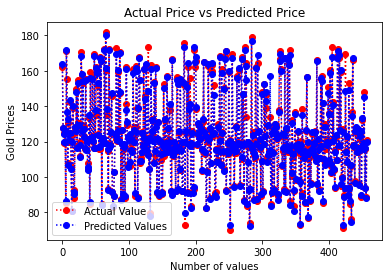

In [ ]:
#Now lets plot one plot for Y_test and one plot for gold_price predictions made using the random forest model
plt.plot(Y_test ,'o:r' , label = "Actual Value")
plt.plot(gold_price_predictions,'o:b',label = "Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("Gold Prices")
plt.legend()
plt.show()

You can see that the actual values are slighly higher than the predicted values.

But still with a 0.98 error this is a good model

Therefore we have succesfully Made a model to predict Gold Prices....